## Data Challenge

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

### Q1.	You are tasked to explore the FICO dataset. Walk us through your process on the tasks below:
    a.You need to think about cleaning the data first. Common data problems include duplicates, missing, and errors in the data. Mark rows with data problems as “Missing” in the FICO column.

### Import Data

### FICO dataset

In [3]:
# Reading the FICO csv
fico = pd.read_csv('D:/Anagha/Masters/NYU GSAS/Job Hunt/American Express/Campus Graduate - 2025 Data Science Finance Summer Internship New York, NY/Data Challenge/FDS_intern_written_test_data1_fico.csv')

# There are 100013 records and 2 columns
fico.shape

(100013, 2)

In [4]:
#Head of the dataset
fico.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


In [5]:
fico.sample(5)

,acct_id,FICO
53254,53242,660
56240,56228,NaN
22954,22950,NaN
78524,78512,NaN
20934,20930,NaN


In [6]:
# acct_id is completely a numeric column and FICO has both numeric and non-numeric values
fico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
# Statistical info about numeric columns
fico.describe()

,acct_id
count,100013.000000
mean,49996.449842
std,28868.457180
min,1.000000
25%,24999.000000
50%,49994.000000
75%,74997.000000
max,100000.000000


### Check if there are duplicates in acct_id, FICO columns

In [8]:
# There are 100000 unique account IDs and none of them as NAs
print(fico['acct_id'].nunique())
print(fico['acct_id'].isna().sum())

100000
0


#### There are no duplicates in acct_id column 

In [9]:
# There are 377 unique FICO values and 29615 NAs
print(fico['FICO'].nunique())
print(fico['FICO'].isna().sum())

377
29615


#### There are 377 unique FICO values and huge number of NAs - 29615

### Check if there are errors in the FICO column
    FICO is a numeric column, check if there are any non-numeric values

In [10]:
fico['FICO'].value_counts()

850    12061
836      865
845      836
828      747
841      668
820      637
839      625
842      608
838      599
834      573
837      572
830      571
827      570
844      564
835      564
840      561
831      559
811      554
849      546
833      539
843      534
832      530
848      528
847      526
829      521
825      503
793      497
824      496
822      486
802      481
823      481
814      480
821      474
818      469
819      467
816      457
785      451
809      444
826      441
817      437
808      421
813      420
767      419
807      408
812      408
777      407
815      405
803      404
806      402
797      392
801      391
805      386
799      371
804      369
788      368
796      364
792      358
759      358
786      356
750      348
800      345
784      341
768      335
798      331
790      330
783      329
773      326
780      324
781      323
758      322
789      322
776      321
766      321
794      321
765      315
795      311
771      306

In [11]:
non_numeric = ~fico['FICO'].astype(str).str.isdigit()
non_numeric_val = fico[non_numeric]

print("Number of rows with non-numeric values in the column:",len(non_numeric_val))

Number of rows with non-numeric values in the column: 29617


    From the above result, we can see that there are two non-numeric values "AA", "SSS" in the FICO column along with NA
    Replace NAs, errors ("AA", "SSS") with "Missing" in FICO column

In [12]:
# Replace NAs and errors with "Missing"
fico['FICO'] = fico['FICO'].apply(lambda x: "Missing" if not str(x).replace('.', '', 1).isdigit() else x)

print("Number of rows marked with 'Missing':",len(fico[fico['FICO'] == "Missing"]))

Number of rows marked with 'Missing': 29617


#### Check duplicates

In [13]:
# Check duplicates in the dataset - 13 duplicates found
duplicate_count = fico.duplicated().sum()
print("Number of duplicate rows in FICO dataset:", duplicate_count)

duplicate_rows = fico[fico.duplicated()]
print("Duplicate rows:\n",duplicate_rows)

Number of duplicate rows in FICO dataset: 13
Duplicate rows:
        acct_id     FICO
140        140      752
190        189      745
192        190      828
194        191      752
196        192      850
30506    30501      773
30508    30502      798
30510    30503      820
30512    30504  Missing
30514    30505      820
30516    30506  Missing
30518    30507  Missing
30520    30508      850


In [14]:
# Drop the duplicate rows - After dropping duplicates, found 100000 unique rows

fico_clean = fico.drop_duplicates()
fico_clean.shape

(100000, 2)

In [15]:
# FICO col description
fico_clean['FICO'].describe()

count      100000
unique        376
top       Missing
freq        29614
Name: FICO, dtype: object

### Summary: 1.a
    The given FICO dataset contains two columns - acct_id and FICO scores.
    - There are 100013 records and 2 columns
    - Out of these records, acct_id has 100000 unique values and no NAs
    - FICO column has 29515 null values and 377 unique FICO values
    - FICO column has two non-numeric values - "AA", "SSS"
    - Marked all the rows with data errors(NAs, "AA", "SSS") with 'Missing': 29617 rows in total (29615 NAs + 2 non-numeric)
    - There are 13 duplicate rows in FICO dataset. I have dropped the duplicates and obtained a cleaned dataset
    - At the end of data cleaning step there are 100000 rows and 2 columns

### Q1.b)
    Think about what you know about credit score. Segment the FICO scores into 5 groups. Give your reasoning for the bucketing. Display the number of customers and percentage of each segments in your answer, and create a histogram of the distribution if you are using Python.

    - FICO score is a 3 digit number which tells the credit score. It helps the banks and other financial institution (lenders) understand the risk associated with a customer - how likey is the customer trusted to repay the loans. Higher the FICO scores, better is the profile of the customer. These scores are also used to determine the rate of interest on a loan request from a customer.
    - The range of FICO scores are 300 - 850. 
    - Exploring the scores in the FICO dataset below

In [16]:
# Removing 'Missing' from FICO col and get the minimum and maximum FICO from this dataset
fico_clean_upd = fico_clean[fico_clean['FICO'] != "Missing"]
fico_clean_upd['FICO'] = pd.to_numeric(fico_clean_upd['FICO'], errors = 'coerce')


print("Minimum FICO:", min(fico_clean_upd['FICO']))
print("Maximum FICO:", max(fico_clean_upd['FICO']))

Minimum FICO: 420
Maximum FICO: 850


In [17]:
# Shape of the dataset after removig "Missing" values
fico_clean_upd.shape

(70386, 2)

### In the give dataset the minimum FICO is 420 amd max FICO is 850. But in realing the FICO can range between 300 to 850. So in order to segment the FICO scores into 5 groups, it is ideally to consider the range 300 to 850. Hence, I have segmented the FICO scores evenly as below:
    300 - 410
    410 - 520
    520 - 630
    630 - 740
    740 - 850

In [18]:
num_buckets = 5
bins = [300, 410, 520, 630, 740, 850]
buckets =["FICO Very Low_[300-410]","FICO Low_[410-520]","FICO Medium_[520-630]","FICO High_[630-740]","FICO Excellent_[740-850]"]
fico_clean_upd['Bucket'] = pd.cut(fico_clean_upd['FICO'], bins, labels = buckets, right = True)

#Calculating frequency
bucket_frequency = fico_clean_upd['Bucket'].value_counts().sort_index()

print("Frequency of FICO buckets:\n")
print(bucket_frequency)

Frequency of FICO buckets:

FICO Very Low_[300-410]         0
FICO Low_[410-520]            163
FICO Medium_[520-630]        1669
FICO High_[630-740]         13553
FICO Excellent_[740-850]    55001
Name: Bucket, dtype: int64


#### Display the number of customers and percentage of each segments in your answer

In [19]:
# Calculating frequency and percentage of each bucket
bucket_frequency = fico_clean_upd['Bucket'].value_counts().sort_index()
bucket_percentage = (bucket_frequency / fico_clean_upd.shape[0]) * 100

# Combine results into a DataFrame for clarity
bucket_stats = pd.DataFrame({
    'Bucket': bucket_frequency.index,
    'Count': bucket_frequency.values,
    'Percentage (%)': bucket_percentage.values
})
print("\n", bucket_stats)


                      Bucket  Count  Percentage (%)
0   FICO Very Low_[300-410]      0         0.00000
1        FICO Low_[410-520]    163         0.23158
2     FICO Medium_[520-630]   1669         2.37121
3       FICO High_[630-740]  13553        19.25525
4  FICO Excellent_[740-850]  55001        78.14196


### Histogram of the distribution

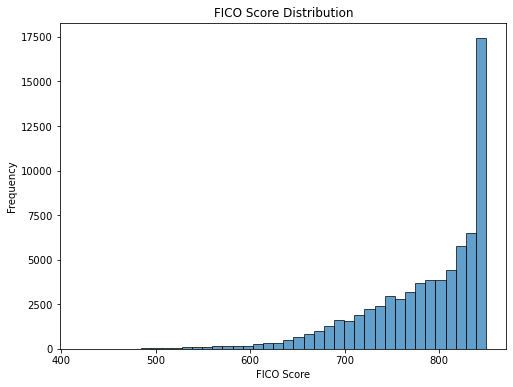

In [20]:
# Plot the histogram of the FICO scores
plt.figure(figsize=(8, 6))
plt.hist(fico_clean_upd['FICO'], bins=40, edgecolor='black', alpha=0.7)
plt.title('FICO Score Distribution')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

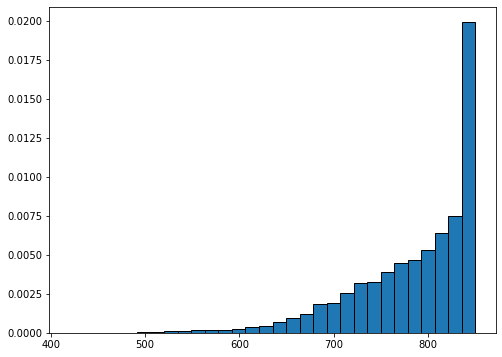

In [21]:
# Same plot with 30 bins
plt.figure(figsize=(8, 6))
plt.hist(fico_clean_upd['FICO'], density=True, bins=30,edgecolor='black')
plt.show()

### Bucket-wise distribution

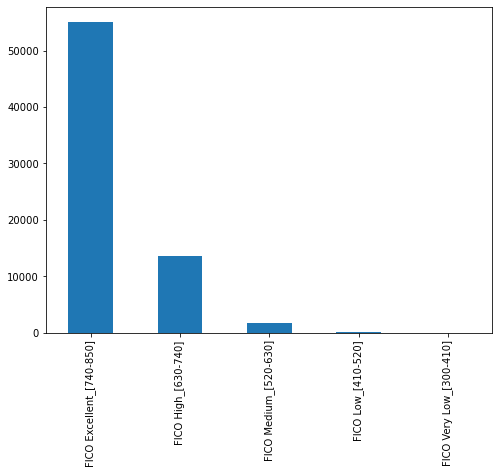

In [22]:
plt.figure(figsize=(8, 6))
fico_clean_upd['Bucket'].value_counts().plot.bar()
plt.show()

### Summary 1.b
    - FICO scores range from 300 - 850. In our dataset, the lowest is 420 and higest is 850.
    - I have divided the FICO in to buckets beginnig from 300, 410, 520, 630, 740, 850 into Very low, Low, Medium, High and Excellent buckets
    - 
    FICO Bucket number of customers and Percentage:
                        Bucket  Count     Percentage (%)
       FICO Very Low_[300-410]      0         0.00000
            FICO Low_[410-520]    163         0.23158
         FICO Medium_[520-630]   1669         2.37121
           FICO High_[630-740]  13553        19.25525
      FICO Excellent_[740-850]  55001        78.14196

### Q1.c
    Do you notice anything particular about this distribution? Do you think this reflects what’s happening in the real world?
    
    - The largest segment is the bucket  [740-850], which contains almost 80% of the customers, indicating that most customers have higher FICO scores. The dataset is skewed towards high FICO scores. Buckets with Very_Low and Low scores have extremely low percentages of customers. This is not typical in reality. 
    - The given dataset doesn't seem to resemble what is happening in the real world. It seems like this is a biased sample (high FICO score accepted scenario).   
    - In real world data, I would expect the distribution to follow near normal distribution where we might see high density in the middle buckets and relatively lower density in the Very Low and Excellent buckets.

### Q2.  Now that you have a clean dataset for FICO. Create a temp table to store the information of FICO score and region for each customer. 
    Make sure the customer id is the same for each record. Display the regions which have the second highest and lowest average FICO score. The result of your query should display only two rows showing the region and its average FICO score. Make sure you provide all the interim steps if needed in your final submission.

### Import Region dataset

In [23]:
region = pd.read_csv('D:/Anagha/Masters/NYU GSAS/Job Hunt/American Express/Campus Graduate - 2025 Data Science Finance Summer Internship New York, NY/Data Challenge/FDS_intern_written_test_data1_region.csv')
region.shape

(100173, 2)

In [24]:
# The sahpe of region data set - (100173, 2)
region.shape

(100173, 2)

In [25]:
# Region has two columns - acct_id and region. No NAs present.
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100173 entries, 0 to 100172
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100173 non-null  int64 
 1   region   100173 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [26]:
# There are 10 unique regions in this dataset and they are -
region['region'].value_counts()

Dallas          10227
San Antonio     10171
Charlotte       10038
Los Angeles     10038
New York        10022
Chicago         10005
Houston          9924
Phoenix          9924
Philadelphia     9913
San Diego        9911
Name: region, dtype: int64

### 
    - Region dataset has 100173 rows and 2 columns.
    - acct_id and region (categorical columns)
    - There are 10 regions in this dataset

### Check for duplicates

In [27]:
region_duplicates = region[region.duplicated()]
print("Number of rows before removing duplicates:", region.shape[0])
print("Number of duplicate rows:", region_duplicates.shape)

region_no_duplicates = region.drop_duplicates()
print("Number of rows after removing duplicates:", region_no_duplicates.shape[0])

Number of rows before removing duplicates: 100173
Number of duplicate rows: (49, 2)
Number of rows after removing duplicates: 100124


### Merging the cleaned FICO data set with cleaned region dataset

In [28]:
fico_clean_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70386 entries, 0 to 100004
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   acct_id  70386 non-null  int64   
 1   FICO     70386 non-null  int64   
 2   Bucket   70386 non-null  category
dtypes: category(1), int64(2)
memory usage: 1.7 MB


In [29]:
cust_data = pd.merge(fico_clean_upd, region_no_duplicates, on = 'acct_id', how = 'left')
print("Shape of merged dataset:",cust_data.shape)

Shape of merged dataset: (70510, 4)


In [30]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70510 entries, 0 to 70509
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   acct_id  70510 non-null  int64   
 1   FICO     70510 non-null  int64   
 2   Bucket   70510 non-null  category
 3   region   70510 non-null  object  
dtypes: category(1), int64(2), object(1)
memory usage: 2.2+ MB


In [31]:
# 124 acct_id's have multiple regions from the below calculation.
# I am not treating them now.

cust_data.shape[0] - fico_clean_upd.shape[0]

124

In [32]:
cust_data.head()

,acct_id,FICO,Bucket,region
0,1,768,FICO Excellent_[740-850],New York
1,2,850,FICO Excellent_[740-850],Dallas
2,3,677,FICO High_[630-740],Los Angeles
3,4,843,FICO Excellent_[740-850],Chicago
4,5,796,FICO Excellent_[740-850],Philadelphia


### Computing the average FICO for each region
- using groupby to group by region

In [33]:
cust_data.groupby('region')['FICO'].mean()

region
Charlotte       785.154280
Chicago         785.643043
Dallas          782.102021
Houston         786.005803
Los Angeles     787.223002
New York        785.065903
Philadelphia    785.773845
Phoenix         788.170231
San Antonio     784.508277
San Diego       784.076447
Name: FICO, dtype: float64

In [34]:
region_avg = cust_data.groupby('region')['FICO'].mean().reset_index()
region_avg.columns = ['region', 'FICO_avg']
print("Average FICO for each region:\n")
print(region_avg)

Average FICO for each region:

         region    FICO_avg
0     Charlotte  785.154280
1       Chicago  785.643043
2        Dallas  782.102021
3       Houston  786.005803
4   Los Angeles  787.223002
5      New York  785.065903
6  Philadelphia  785.773845
7       Phoenix  788.170231
8   San Antonio  784.508277
9     San Diego  784.076447


In [35]:
# Assign ranks
region_avg['rank_asc'] = region_avg['FICO_avg'].rank(method = 'dense')
region_avg['rank_desc']= region_avg['FICO_avg'].rank(method = 'dense', ascending = False)
region_avg_sorted = region_avg.sort_values(by = 'rank_asc', ascending = True).reset_index()
region_avg_sorted

print(region_avg_sorted)

   index        region    FICO_avg  rank_asc  rank_desc
0      2        Dallas  782.102021       1.0       10.0
1      9     San Diego  784.076447       2.0        9.0
2      8   San Antonio  784.508277       3.0        8.0
3      5      New York  785.065903       4.0        7.0
4      0     Charlotte  785.154280       5.0        6.0
5      1       Chicago  785.643043       6.0        5.0
6      6  Philadelphia  785.773845       7.0        4.0
7      3       Houston  786.005803       8.0        3.0
8      4   Los Angeles  787.223002       9.0        2.0
9      7       Phoenix  788.170231      10.0        1.0


### Display the regions which have the second highest and lowest average FICO score. 

In [36]:
result = region_avg[(region_avg['rank_asc'] == 2) | (region_avg['rank_desc'] == 2)][['region', 'FICO_avg']]
print("Regions with second highest and lowest average FICO:")
result

Regions with second highest and lowest average FICO:


,region,FICO_avg
4,Los Angeles,787.223002
9,San Diego,784.076447


### Summary 2:
    - Region dataset has 100173 rows and 2 columns.acct_id and region (categorical columns)
    - There are 10 regions in this dataset
    - There were 49 duplicate rows and the data was cleaned to remove duplicates, final shape of the dataset after cleaning (100124, 2)
    - There ate 124 accounts IDs with multiple regions, I have not treated this for now.
    - To get the average FICO across all regions, we have to merge the FICO dataset and Region dataset.
    - Calculate the average using groupby and aggregate functions:
    Average FICO for each region:
             region    FICO_avg
    0     Charlotte  785.154280
    1       Chicago  785.643043
    2        Dallas  782.102021
    3       Houston  786.005803
    4   Los Angeles  787.223002
    5      New York  785.065903
    6  Philadelphia  785.773845
    7       Phoenix  788.170231
    8   San Antonio  784.508277
    9     San Diego  784.076447
    
    - The regions with second highest and lowest average was calculated using rank() function: Los Angeles (787.22) and San Diego (784.07) respectively
    
        region	FICO_avg
    4	Los Angeles	787.223002
    9	San Diego	784.076447